<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [26]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [27]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [28]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df= pd.read_csv('titanic.csv')
des=df.describe()
des.loc['Nan']= df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [29]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df1=df[['Survived','Pclass','Sex','Age','SibSp','Parch']]

In [31]:
# Alumno, elimine aquellas filas que tengan columnas vacias
df_clean = df1.dropna()

In [32]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('Filas para analizar:', df_clean.shape[0])

Filas para analizar: 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [33]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Cantidad de personas que sobrevivieron: 290
Cantidad de personas que no sobrevivieron: 424


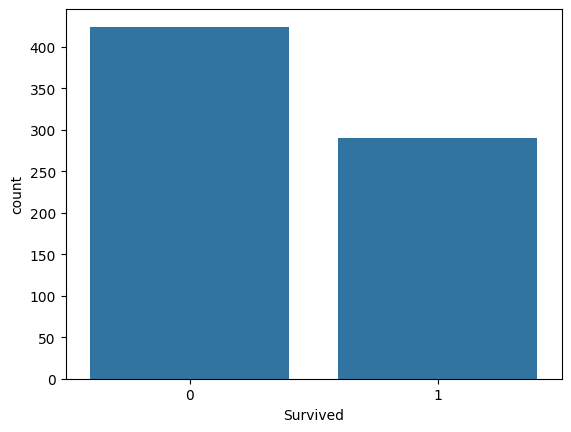

In [34]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
print('Cantidad de personas que sobrevivieron:', df_clean['Survived'].value_counts()[1])
print('Cantidad de personas que no sobrevivieron:', df_clean['Survived'].value_counts()[0])
sns.countplot(data = df_clean, x ='Survived')
plt.show()


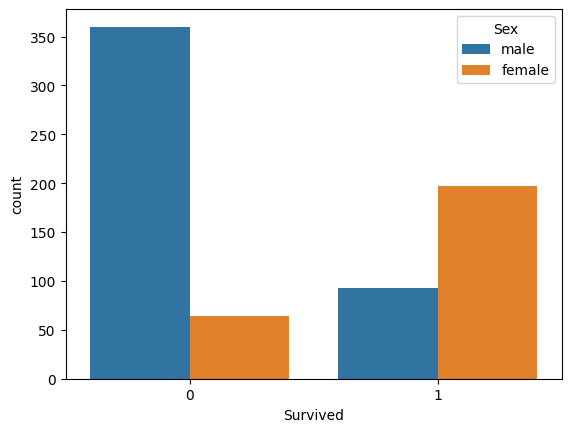

In [35]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data = df_clean, x ='Survived',hue='Sex')
plt.show()

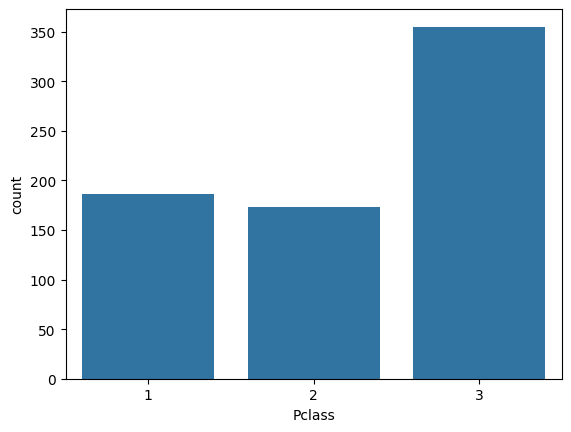

In [36]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(data = df_clean, x ='Pclass')
plt.show()

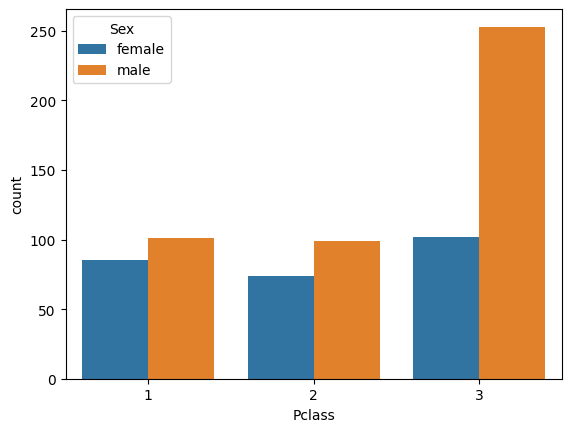

In [37]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data = df_clean, x ='Pclass', hue='Sex')
plt.show()

#### Transformar variables categóricas texto a clases numeradas

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod= df_clean.copy()
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [40]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le_sex= LabelEncoder()
label_encoder = le_sex.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoder
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [41]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le_sex.classes_

array(['female', 'male'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [42]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X= df_cod.drop('Survived', axis=1).values
y= df_cod['Survived'].values


Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [43]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

In [45]:
#Modelo Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=5)
rf = rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [46]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
print('Exactitud del modelo Random forest:', accuracy_score(y_test, y_hat, normalize=True))

Exactitud del modelo Random forest: 0.786046511627907


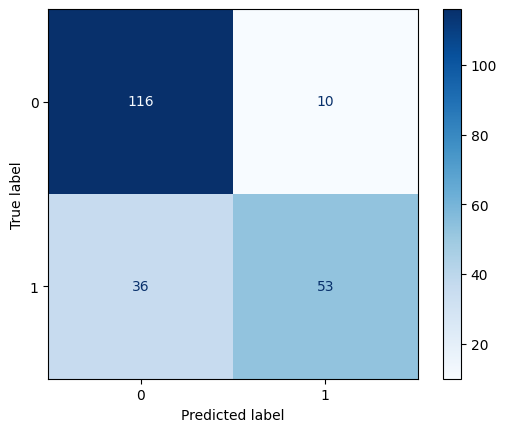

In [47]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels = rf.classes_)
cmd.plot(cmap=plt.cm.Blues)

plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [48]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

df_cod.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0


In [72]:
def prueba(Pclass, Sex, Age, SibSp, Parch):
    df_prueba = pd.DataFrame({'Pclass':	[Pclass],'Sex':[Sex], 'Age':[Age],
                              'SibSp':[SibSp], 'Parch':[Parch]})

    le_transform = le_sex.transform(df_prueba['Sex'])
    df_prueba['Sex'] = le_transform
    X_prueba = df_prueba.values
    y_hat_prueba = rf.predict(X_prueba)

    if y_hat_prueba == [1]:
      print('\n¡Felicidades, has sobrevivido!')
    else:
      print('\nHas muerto ¡Ahora eres un fantasma!')

    return

In [75]:
print('¿Sobrevivirías al titanic?')

Pclass= input('\nClase que serías (1, 2, 3): ')
while Pclass.isdigit()==False:
  Pclass= input('''No se permite el valor ingresado.
Vuelve a probar con 1, 2 o 3: ''')
Pclass= int(Pclass)
while Pclass > 3 or Pclass < 1:
  Pclass= int(input('''No se permite el número ingresado.
Vuelve a probar con 1, 2 o 3: '''))

Sex=input('\nSexo que serías (female o male):').lower()
while Sex != 'female' and Sex != 'male':
  Sex= input('''El valor ingresado es incorrecto, solo se permite
"female" o "male".\nVuelve a probar: ''').lower()

Age = input('\nEdad que tendrías: ')
while Age.isdigit()==False:
  Age= input('''No se permite el valor ingresado.
Vuelve a probar: ''')
Age= int(Age)

SibSp = input('\nCantidad de hermanos y esposas/esposos que tendrías: ')
while SibSp.isdigit()==False:
  SibSp= input('''No se permite el valor ingresado.
Vuelve a probar: ''')
SibSp= int(SibSp)

Parch = input('\nCantidad de hijos a bordo: ')
while Parch.isdigit()==False:
  Parch= input('''No se permite el valor ingresado.
Vuelve a probar: ''')
Parch= int(Parch)

prueba(Pclass, Sex, Age, SibSp, Parch)

¿Sobrevivirías al titanic?

Clase que serías (1, 2, 3): dos
No se permite el valor ingresado.
Vuelve a probar con 1, 2 o 3: 2

Sexo que serías (female o male):0
El valor ingresado es incorrecto, solo se permite
"female" o "male".
Vuelve a probar: FEMALE

Edad que tendrías: 14

Cantidad de hermanos y esposas/esposos que tendrías: 2

Cantidad de hijos a bordo: cero
No se permite el valor ingresado.
Vuelve a probar: 0

¡Felicidades, has sobrevivido!
